# Homework X:  Hyperparameter Tuning and Model Optimization

Welcome to the course **AI and Deep learning**!

In this homework, we will delve into the crucial aspects of machine learning model development, including **hyperparameter tuning, bias-variance trade-off, loss function calculation, regularization techniques, and Grid Search for hyperparameter selection**. These topics form the foundation of building efficient and generalizable models. By completing this homework, you will gain a comprehensive understanding of how to optimize model performance through careful hyperparameter selection and regularization. Hope you enjoy this homework!   

**Learning Goal**: In this homework,you will achieve the following:
 * Understand the role of hyperparameters in model performance.
 * Learn about bias and variance and their impact on model accuracy.
 * Explore common loss functions and their applications.
 * Gain knowledge of regularization techniques to prevent overfitting.
 * Master the Grid Search method for hyperparameter tuning.

# Table of Contents
* [1 - Packages](#1)
* [2 - Introduction to Hyperparameters](#2)
* [3 - Bias and Variance](#3)
  * [3.1 - Definition](#3.1)
  * [3.2 - Examples](#3.2)
* [4 - Dataset Division](#4)
  * [4.1 - Generate a Simple Dataset](#4.1)
  * [4.2 - Train/Validation/Test Split](#4.2)
* [5 - Loss Function](#5)
* [6 - Regularization](#6)
* [7 - Grid Search for Hyperparameter Tuning](#7)
  * [7.1 - Principle and Implementation](#7.1)
  * [7.2 - Model Training and Evaluation with Regularization](#7.2)
  * [7.3 - Drawing Loss Function Plots During Grid Search](#7.3)
  * [7.4 - Play by Yourself!](#7.4)

<a name='1'></a>
## 1- Packages

In order to finish a task, we need commands from certain **Python** packages.

In [1]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.metrics import log_loss
#from mpl_toolkits.mplot3d import Axes3

<a name='2'></a>
## 2 - Introduction to Hyperparameters

In previous lessons, we have introduced fully connected neural networks in some detail. When we introduced fully connected neural networks, we discussed two main types of parameters.

The first type is the **model parameter**, which can be understood as the configuration variables inside the model, which can be estimated or learnt from the training samples; the corresponding bias and weight terms of each neuron can be iteratively updated by the gradient descent method, which is a typical model parameter. 

The second type of parameter is the **hyperparameter** of the model, which can be understood as the configuration outside the model, and cannot be learned through the gradient descent method of training samples, but needs to be set by us manually. 

Here are some typical hyperparameters:

1. $\alpha$ : Learning rate

2. $L$ : Number of layers

3. $\{d^{[l]} : l = 1, \ldots, L-1\}$ : Number of neurons per each hidden layer

4. $m$ : Mini-batch size

5. Gradient descent algorithm

6. Number of iterations for the chosen gradient descent algorithm

7. $\ldots$

<a name='3'></a>
## 3 - Bias and Variance

<a name='3.1'></a>
### 3.1 - Definition

Before introducing hyperparameter selection, we first need to discuss two classical concepts in statistics, namely Bias and Variance.We begin by recognising some notation.

- $\boldsymbol{x}$ : feature

- $y$ : Observed label

- $y_t$ : true target ($y_t = E(y \mid \boldsymbol{x})$)

- $\mathcal{S} = \{(\boldsymbol{x}_i, y_i) : i = 1, \ldots, n\}$ : training examples

- $\hat{y}$ : estimation of the true label $y_t$ by a model

The Bias and Variance of this estimator are:

1. Bias
$$
\text{Bias}(\hat{y}) = E_S(\hat{y}) - y_t
$$
- $E_S(\cdot)$ : expectation with respect to the randomness of the sample $S$
- Bias and variance are defined for a feature $\boldsymbol{x}$

2. Variance
$$
\text{Variance}(\hat{y}) = E_S\{ \hat{y} - E_S(\hat{y}) \}^2
$$

Below we will practice how to code bias and variance with two examples.

<a name='3.2'></a>
### 3.2 - Examples

### linear regression

$\boldsymbol{x}$ : a feature

$y_t$ : true label
$$
y_t = b_0 + \boldsymbol{x}^\top \boldsymbol{w}_0
$$
- $b_0, \boldsymbol{w}_0$ : model parameters

$y$ : observed label
$$
y = b_0 + \boldsymbol{x}^\top \boldsymbol{w}_0 + \epsilon
$$
- $\epsilon$ : random noise



$\hat{y}$ : estimated label
$$
\hat{y} = \hat{b} + \boldsymbol{x}^\top \hat{\boldsymbol{w}}
$$
- $\hat{b}, \hat{\boldsymbol{w}}$ : estimated model parameters

Below, first we generate the data.


In [2]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
# Generate a simple dataset
np.random.seed(42)
X = np.random.rand(100, 1)
y = 2 + 3 * X + np.random.randn(100, 1)

Then we split the dataset into training and test sets

In [3]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In the following cell, you should fill in the blank code.

In [4]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
# Train a linear regression model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred = lin_reg.predict(X_test)

# Calculate bias and variance
### YOUR CODE BEGINS HERE (approximately 2 lines)
bias = np.mean(y_pred - y_test)
variance = np.var(y_pred - y_test)
### YOUR CODE ENDS

You may want to run the following code to check if your code is correct.

In [5]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
print(f"Bias: {bias}, Variance: {variance}")
print("Your result should be:\nBias: -0.22357312091381823, Variance: 0.6037145733218573")

Bias: -0.22357312091381823, Variance: 0.6037145733218573
Your result should be:
Bias: -0.22357312091381823, Variance: 0.6037145733218573


In traditional statistical analyses, complex statistical models tend to have less bias and more variance, i.e. they tend to overfit the data. On the contrary, simple statistical models tend to have higher bias and lower variance, i.e. they tend to underfit the data. The question of how to make a better trade-off between bias and variance to get a model that performs well is one that we often encounter when analysing data.

### ridge regression
In ridge regression, overfitting is avoided by limiting the complexity of the linear model by adding an l2 regularisation term (also known as a penalty term) to the loss function, giving up the unbiased nature of the least squares method, and obtaining more realistic and reliable regression coefficients at the expense of losing some of the information and reducing the accuracy.

The loss function for ridge regression with respect to the model parameters $b$ as well as $w$ is:

Minimize
$$
\sum_{i=1}^n (y_i - \boldsymbol{x}_i^\top \beta)^2 + \lambda \sum_{j=1}^d \beta_j^2
$$
- $\lambda$ : hyperparameter to control the complexity of the model

In the following cell, you should fill in the blank code.

In [6]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
# Generate a simple classification dataset
from sklearn.datasets import make_classification

np.random.seed(42)
X_class, y_class = make_classification(n_samples=100, n_features=5, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, random_state=42)

# Split the dataset into training and test sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Train a logistic regression model with L2 regularization
ridge_reg = LogisticRegression(penalty='l2', C=1.0)
ridge_reg.fit(X_train_class, y_train_class)

# Make predictions
y_pred_proba = ridge_reg.predict_proba(X_test_class)[:, 1]

# Calculate bias and variance using the probabilities
### YOUR CODE BEGINS HERE (approximately 2 lines)
bias_ridge = np.mean(y_pred_proba - y_test_class)
variance_ridge = np.var(y_pred_proba - y_test_class)
### YOUR CODE ENDS

You may want to run the following code to check if your code is correct.

In [7]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
print(f"Bias (Ridge): {bias_ridge}, Variance (Ridge): {variance_ridge}")
print("Your result should be:\nBias (Ridge): 5.9117574330186386e-05, Variance (Ridge): 0.005800490788812068")

Bias (Ridge): 5.9117574330186386e-05, Variance (Ridge): 0.005800490788812068
Your result should be:
Bias (Ridge): 5.9117574330186386e-05, Variance (Ridge): 0.005800490788812068


<a name='4'></a>
## 4 - Dataset Division

In traditional statistical modelling, hyperparameters are usually selected with the help of cross-validation. 

Cross validation improves the accuracy of the model evaluation as well as its generalisation ability, and its many variants increase the flexibility of the method. However, the method has many drawbacks, such as high computational cost. Large neural network models often correspond to parametric quantities on the scale of tens of millions (or even billions), which leads to very slow training of large models.

In addition, the hyperparameters of neural networks tend to be large in size, and we are unable to select the hyperparameters of the models by cross-validation methods.

For deep learning models, we use validation set to tune hyperparameters
   - Training dataset: to train a deep learning model
   - Validation dataset: evaluate the performance of the model with different hyperparameters
   - Test dataset (optional): test the performance of the CHOSEN model in real application

<a name='4.1'></a>
### 4.1 - Generate a Simple Dataset

In [8]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
# Generate a simple classification dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# View the dataset
print(f"Feature data shape: {X.shape}")
print(f"Label data shape: {y.shape}")

Feature data shape: (1000, 20)
Label data shape: (1000,)


<a name='4.2'></a>
### 4.2 - Train/Validation/Test Split

Please complete the following code so that the ratio of training set, validation set and test set is 6:2:2.

In [9]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
# Split the dataset into training and remaining data

### YOUR CODE BEGINS HERE (approximately 1 lines)
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.4, random_state=42)
### YOUR CODE ENDS

# Further split the remaining data into validation and test sets

### YOUR CODE BEGINS HERE (approximately 1 lines)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)
### YOUR CODE ENDS

You may want to run the following code to check if your code is correct.

In [10]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
# View the number of samples in each dataset
print(f"Training set sample count: {len(X_train)}")
print(f"Validation set sample count: {len(X_val)}")
print(f"Test set sample count: {len(X_test)}")
print("\nYour result should be:\nTraining set sample count: 600\nValidation set sample count: 200\nTest set sample count: 200")

Training set sample count: 600
Validation set sample count: 200
Test set sample count: 200

Your result should be:
Training set sample count: 600
Validation set sample count: 200
Test set sample count: 200


<a name='5'></a>
## 5 - Loss Function

In this section we will review or introduce a few of common loss functions, please complete the code according to the given formulas.

1. **Mean Squared Error (MSE)**
$$
MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$
- Commonly used in regression tasks. It penalizes larger errors quadratically.

In [11]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
def sigmoid(x):
    # x: input
    
    ### YOUR CODE BEGINS HERE (approximately 1 line)
    y = 1.0 / (1.0 + np.exp(-x))
    ### YOUR CODE ENDS HERE
    
    return y

# PLEASE DO NOT CHANGE THE FOLLOWING CODE
def sigmoid_derivative(x):
    # x: input
    
    ### YOUR CODE BEGINS HERE (approximately 2 lines)
    sig = sigmoid(x)
    y = sig * (1 - sig)
    ### YOUR CODE ENDS HERE
    
    return y

In [12]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
def mse(y_true, y_pred):
    
    ### YOUR CODE BEGINS HERE (approximately 1 line)
    mse = np.mean((y_true - y_pred) ** 2)
    ### YOUR CODE ENDS HERE
    
    return mse

2. **Mean Absolute Error (MAE)**
$$
MAE = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|
$$
-  Also used in regression. It is less sensitive to outliers compared to MSE.

In [13]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
def mae(y_true, y_pred):
    
    ### YOUR CODE BEGINS HERE (approximately 1 line)
    mae = np.mean(np.abs(y_true - y_pred))
    ### YOUR CODE ENDS HERE
    
    return mae

3. **Cross-Entropy Loss (Log Loss)**
$$
H(y, \hat{y}) = -\frac{1}{n} \sum_{i=1}^n \left[ y_i \log \hat{y}_i + (1 - y_i) \log (1 - \hat{y}_i) \right]
$$
-  Widely used in classification problems, especially for probabilistic models.

In [14]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
def log_loss(y_true, y_pred):
    
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    ### YOUR CODE BEGINS HERE (approximately 1 line)
    log_loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    ### YOUR CODE ENDS HERE
    
    return log_loss

You may want to run the following code to check if your code is correct.

In [15]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
# Generate sample data for demonstration
y_true = np.array([1, 0, 1, 1, 0])
y_pred = np.array([0.9, 0.1, 0.8, 0.7, 0.2])

# Calculate loss values
mse_loss = mse(y_true, y_pred)
mae_loss = mae(y_true, y_pred)
log_loss_value = log_loss(y_true, y_pred)

print(f"MSE Loss: {mse_loss}")
print(f"MAE Loss: {mae_loss}")
print(f"Log Loss: {log_loss_value}")
print("\nYour result should be:\nMSE Loss: 0.038\nMAE Loss: 0.18\nLog Loss: 0.20273661557656092")

MSE Loss: 0.038
MAE Loss: 0.18
Log Loss: 0.20273661557656092

Your result should be:
MSE Loss: 0.038
MAE Loss: 0.18
Log Loss: 0.20273661557656092


<a name='6'></a>
## 6 - Regularization

Regularisation is a more common method for neural network models, which has a more significant effect on reducing the complexity of the model and thus the variance of the model. In this section, we discuss several types of classical regularisation methods.

### $l_2$ regularisation 
We have already briefly discussed $l_2$ regularisation in ridge regression. The core idea is to prevent model overfitting by adding an extra penalty term to the model's loss function, thus improving the model's generalisation ability.

$l_2$ penalty is generally of the form:
$$
\mathcal{J}_2 = \frac{\lambda}{2n} \sum_{l=1}^L \| \boldsymbol{W}^{[l]} \|_F^2
$$
- $\lambda$ : hyperparameter
- Derivative
$$
\frac{\partial \mathcal{J}_2}{ \partial \boldsymbol{W}^{[l]} } = \frac{\lambda}{n} \boldsymbol{W}^{[l]}
$$
- It is used to control the complexity of the model

### $l_1$ regularisation
$l_1$ regularisation is the addition of the sum of the absolute values of all weighting parameters to the loss function (multiplied by a conditioning parameter), which is used to penalise too large a parameter and drive the model to be more sparse.

$l_1$ penalty is generally of the form:
$$
\mathcal{J}_1 = \frac{\lambda}{n} \sum_{l=1}^L \| \boldsymbol{W}^{[l]} \|_1
$$
- **Derivative**
$$
\frac{\partial \mathcal{J}_1}{\partial \boldsymbol{W}^{[l]}} = \frac{\lambda}{n} \text{sign}(\boldsymbol{W}^{[l]})
$$
- **It is used to**
  - control the complexity of the model
  - induce sparsity

$l_1$ or $l_2$ regularisation can be applied in scikit-learn's **LogisticRegression** by setting the penalty parameter. Here is a simple example:

In [16]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
def l1_regularization(weights, lambda_param):
    """
    Compute L1 regularization term.
   
    """
    # Step 1. Compute the absolute values of the weights
    # Step 2. Sum the absolute values
    # Step 3. Multiply by lambda_param

    ### YOUR CODE BEGINS HERE (approximately 3 lines)
    absolute_weights = np.abs(weights)
    sum_absolute_weights = np.sum(absolute_weights)
    l1_term = lambda_param * sum_absolute_weights
    ### YOUR CODE ENDS HERE

    return l1_term

In [17]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
def l2_regularization(weights, lambda_param):
    """
    Compute L2 regularization term.

    """
    # Step 1. Compute the squared values of the weights
    # Step 2. Sum the squared values
    # Step 3. Multiply by lambda_param and divide by 2

    ### YOUR CODE BEGINS HERE (approximately 3 lines)
    squared_weights = np.square(weights)
    sum_squared_weights = np.sum(squared_weights)
    l2_term = (lambda_param / 2) * sum_squared_weights
    ### YOUR CODE ENDS HERE

    return l2_term

You may want to run the following code to check if your code is correct.

In [25]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
# Example usage
if __name__ == "__main__":
    # Define model weights and regularization strength
    weights = np.array([0.5, -1.0, 2.0, -0.5])
    lambda_param = 0.1

    # Compute L1 and L2 regularization terms
    l1_term = l1_regularization(weights, lambda_param)
    l2_term = l2_regularization(weights, lambda_param)

    # Output the results
    print(f"L1 Regularization Term: {l1_term}")
    print(f"L2 Regularization Term: {l2_term}")
    
print("\nYour result should be:\nL1 Regularization Term: 0.4\nL2 Regularization Term: 0.275")

L1 Regularization Term: 0.4
L2 Regularization Term: 0.275

Your result should be:
L1 Regularization Term: 0.4
L2 Regularization Term: 0.275


### Dropout
**Dropout** is a regularisation technique commonly used in training deep learning models, the core idea of which is to randomly ‘dropout’ (i.e., set to 0) a portion of the neurons in each hidden layer of the neural network during the training process to mitigate the overfitting of the model to the training data.

### Early Stopping
During the training process of a deep learning model, the model usually improves its performance on the training set as the training progresses. However, when the model learns too much about the training data, it may capture noise and specific features in the training data, causing the performance on the validation (or test) set to begin to degrade, i.e., overfitting occurs. 

**Early stopping** technique avoids overfitting by monitoring the model's performance on the validation set and stopping the training in time when it is found that the performance no longer improves or starts to decline.

<a name='7'></a>
## 7 - Grid Search for Hyperparameter Tuning

<a name='7.1'></a>
### 7.1 - Principle and Implementation

Grid search is a systematic and comprehensive method for hyperparameter tuning. It operates by traversing a predefined hyperparameter space, exhaustively evaluating each combination of hyperparameters through model training and cross-validation. This approach ensures that no combination is left unexplored within the defined grid.

The process of grid search can be succinctly described by the following steps:
1. **Define the hyperparameter grid (Θ)**: Specify various combinations of hyperparameters, such as learning rates, tree depths, or regularization strengths.
2. **Iterate over each combination (θ) in the grid (Θ)**:
   - Train a model (M) on the training dataset using the current θ.
   - Evaluate model (M) using cross-validation to determine its performance.
3. **Select the best hyperparameter combination (θ)**: Choose the combination that achieves the optimal performance metric (e.g., highest accuracy or best F1-score).

**Your Task:**
- Implement grid search for a random forest classifier.
- Define the hyperparameter grid and initialize GridSearchCV.

**Steps:**
1. Define the model.
2. Define the hyperparameter grid.
3. Initialize GridSearchCV.
4. Perform grid search.
5. Output the best hyperparameters and score.

In [19]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
# Set the random seed for reproducibility
RANDOM_STATE = 220
np.random.seed(RANDOM_STATE)

def custom_grid_search(X, y, model_class, param_grid, cv=3, scoring='accuracy'):
    """
    Custom grid search function to find the best hyperparameters for a model.
    
    """
    # X: Feature data
    # y: Target data
    # model_class: The model class to be used (e.g., RandomForestClassifier)
    # param_grid: A dictionary where keys are parameter names and values are lists of parameter values to try
    # cv: Number of cross-validation folds
    # scoring: The evaluation metric to use

    # Step 1: Split the data into training and validation sets for cross-validation
    # Step 2: Generate all possible combinations of hyperparameters
    # Step 3: Initialize variables to store the best model and score
    # Step 4: Iterate over each combination of hyperparameters
    #         Step 4.1: Perform cross-validation
    #         Step 4.2: Update the best score and parameters if the current combination is better
    
    ### YOUR CODE BEGINS HERE (approximately 20 lines)
    cv_splits = []
    for i in range(cv):
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/cv, random_state=RANDOM_STATE + i)
        cv_splits.append((X_train, X_val, y_train, y_val))
    
    param_combinations = generate_param_combinations(param_grid)
    
    best_score = -np.inf
    best_params = {}
    cv_results = {"params": [], "mean_test_score": []}
    
    for params in param_combinations:
        model = model_class(random_state=RANDOM_STATE, **params)
        
        avg_score = 0
        for split in cv_splits:
            X_train, X_val, y_train, y_val = split
            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)
            score = calculate_score(y_val, y_pred, scoring)
            avg_score += score / cv
        
        if avg_score > best_score:
            best_score = avg_score
            best_params = params
        
        ### YOUR CODE ENDS
        cv_results["params"].append(params)
        cv_results["mean_test_score"].append(avg_score)
    
    return {"best_params": best_params, "best_score": best_score, "cv_results": cv_results}

def generate_param_combinations(param_grid):
    """
    Generate all possible combinations of hyperparameters.
   
    """
    
    # param_grid: A dictionary where keys are parameter names and values are lists of parameter values

    # Step 1: Extract the keys and values from the parameter grid
    # Step 2: Generate all possible combinations of hyperparameters
    
    from itertools import product
    ### YOUR CODE BEGINS HERE (approximately 5 lines)
    keys = param_grid.keys()
    values = param_grid.values()
    param_combinations = []
    for combination in product(*values):
        param_combinations.append(dict(zip(keys, combination)))   
    ### YOUR CODE ENDS

    return param_combinations

def calculate_score(y_true, y_pred, scoring):
    """
    Calculate the evaluation score based on the true and predicted values.
    """
    if scoring == 'accuracy':
        return accuracy_score(y_true, y_pred)
    else:
        raise ValueError(f"Scoring metric '{scoring}' is not supported.")

You may want to run the following code to check if your code is correct.

In [20]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
# Example usage
if __name__ == "__main__":
    # Generate a simple classification dataset
    X, y = make_classification(n_samples=100, n_features=20, n_classes=2, random_state=RANDOM_STATE)

    # Define the model class and hyperparameter grid
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }

    # Perform custom grid search
    result = custom_grid_search(X, y, RandomForestClassifier, param_grid, cv=3, scoring='accuracy')

    # Output the best hyperparameters and score
    print("Best Hyperparameters:", result["best_params"])
    print("Best Score:", result["best_score"])

print("Your result should be:\nBest Hyperparameters: {'n_estimators': 50, 'max_depth': None, 'min_samples_split': 2}\nBest Score: 0.9019607843137254")

Best Hyperparameters: {'n_estimators': 50, 'max_depth': None, 'min_samples_split': 2}
Best Score: 0.9019607843137254
Your result should be:
Best Hyperparameters: {'n_estimators': 50, 'max_depth': None, 'min_samples_split': 2}
Best Score: 0.9019607843137254


<a name='7.2'></a>
### 7.2 - Model Training and Evaluation with Regularization and Early Stopping

In this section, you will train a neural network with L2 regularization and early stopping. Regularization helps prevent overfitting by adding a penalty term to the loss function, while early stopping monitors the validation performance and stops training when it stops improving.

You can train a neural network with L2 regularization and early stopping by running the following cell.

In [21]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
def train_neural_network(X_train, y_train, X_val, y_val, X_test, y_test):
    """
    Train a neural network with L2 regularization and early stopping.
    
    Parameters:
    X_train: Training feature data.
    y_train: Training target data.
    X_val: Validation feature data.
    y_val: Validation target data.
    X_test: Test feature data.
    y_test: Test target data.
    
    Returns:
    tuple: A tuple containing the trained model, validation loss, and test loss.
    """
    # Initialize the neural network with regularization and early stopping parameters
    mlp = MLPClassifier(
        hidden_layer_sizes=(100,), 
        activation='relu', 
        max_iter=1000, 
        random_state=RANDOM_STATE,
        alpha=0.01,  # L2 regularization term
        early_stopping=True,  # Enable early stopping
        validation_fraction=0.1  # Fraction of training data used for validation
    )

    # Train the model
    mlp.fit(X_train, y_train)

    # Evaluate the model on the validation set
    val_loss = log_loss(y_val, mlp.predict_proba(X_val)[:, 1])  # Use the probability of the positive class

    # Evaluate the model on the test set
    test_loss = log_loss(y_test, mlp.predict_proba(X_test)[:, 1])  # Use the probability of the positive class

    return mlp, val_loss, test_loss

In [22]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
# Example usage
if __name__ == "__main__":
    # Assuming X_train, y_train, X_val, y_val, X_test, y_test are already defined
    mlp, val_loss, test_loss = train_neural_network(X_train, y_train, X_val, y_val, X_test, y_test)

    # Output the validation and test loss
    print(f"Validation loss with regularization and early stopping: {val_loss}")
    print(f"Test loss with regularization and early stopping: {test_loss}")

print("Your result should be:\nValidation loss with regularization and early stopping: 0.44353649267749323\nTest loss with regularization and early stopping: 0.4193853695259757")

Validation loss with regularization and early stopping: 0.44353649267749323
Test loss with regularization and early stopping: 0.4193853695259757
Your result should be:
Validation loss with regularization and early stopping: 0.44353649267749323
Test loss with regularization and early stopping: 0.4193853695259757


<a name='7.3'></a>
### 7.3 - Drawing Loss Function Plots During Grid Search

In this section, you will visualize the loss function during grid search to understand how different hyperparameters affect model performance. You can create both 3D and 2D plots of the loss function by running the following cell.

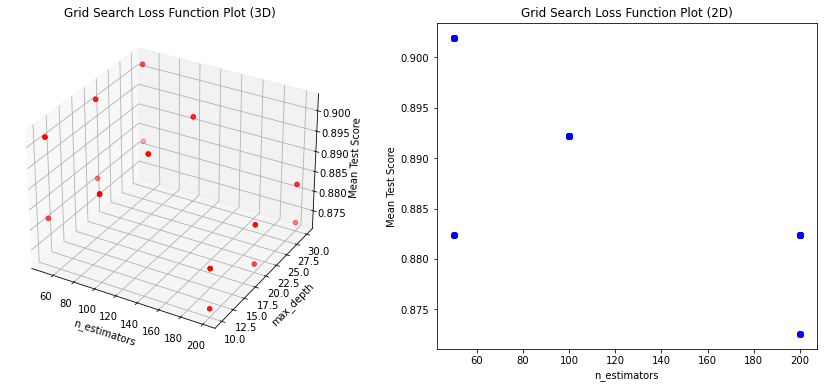

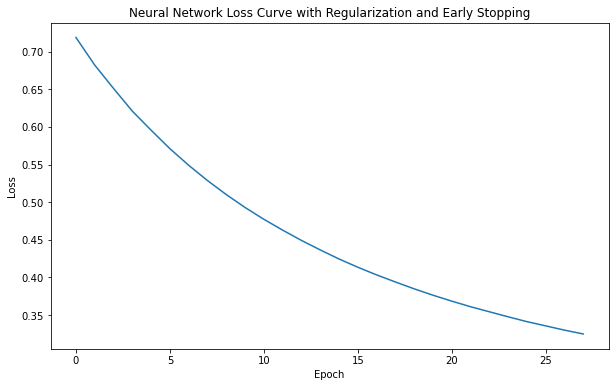

<Figure size 432x288 with 0 Axes>

In [23]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
from mpl_toolkits.mplot3d import Axes3D

def plot_loss_function(cv_results, mlp):
    """
    Plot the loss function during grid search and neural network training.
    """
    # Extract data for plotting from grid search results
    params = cv_results["params"]
    mean_test_scores = cv_results["mean_test_score"]
    n_estimators = [param["n_estimators"] for param in params]
    max_depth = [param["max_depth"] if param["max_depth"] is not None else 30 for param in params]

    # Create a figure with two subplots
    fig = plt.figure(figsize=(15, 6))

    # First subplot: 3D plot
    ax1 = fig.add_subplot(121, projection="3d")
    ax1.scatter(n_estimators, max_depth, mean_test_scores, c="r", marker="o")
    ax1.set_xlabel("n_estimators")
    ax1.set_ylabel("max_depth")
    ax1.set_zlabel("Mean Test Score")
    ax1.set_title("Grid Search Loss Function Plot (3D)")

    # Second subplot: 2D plot
    ax2 = fig.add_subplot(122)
    ax2.scatter(n_estimators, mean_test_scores, c="b", marker="o")
    ax2.set_xlabel("n_estimators")
    ax2.set_ylabel("Mean Test Score")
    ax2.set_title("Grid Search Loss Function Plot (2D)")

    # Plot neural network loss curve
    plt.figure(figsize=(10, 6))
    plt.plot(mlp.loss_curve_)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Neural Network Loss Curve with Regularization and Early Stopping")
    plt.show()

    # Adjust layout for the first figure
    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Assuming result and mlp are already defined from previous steps
    plot_loss_function(result["cv_results"], mlp)

<a name='7.4'></a>
### 7.4 - Play by Yourself!

You can further explore different hyperparameter combinations and neural network architectures
For example, adjust the number of neurons in the hidden layer of the neural network and observe changes in performance.

In this assignment, the Dropout and Early Stop examples are not given, so you can try them yourself!